# Problem 1

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

## 1. You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.



---



### A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/austo_automobile+%282%29+%281%29.csv")

In [ ]:
# Get the size of the dataset (number of rows and columns)
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Get information about the nature of the variables (data types and summary statistics)
data_info = df.info()
print(data_info)


Number of rows: 1581
Number of columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB
None


The dataset has 1581 rows and 14 columns.
There are 8 object data types, 5 integer data types, and 1 float data type in the dataset.

### B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [ ]:
# Display the first few rows of the dataset to get an overview
print(df.head())

   Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SU

In [ ]:
# Check for any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [ ]:
# Check for any duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values based on the variable's nature (e.g., using mean, median, or mode imputation)
# For instance, if a variable is numerical, you might replace missing values with the mean or median.
# Example of mean imputation for a numerical column named "Age"
# Calculate the mean of the column "Age"
mean_age = df["Age"].mean()

# Fill missing values in the column "Age" with the calculated mean
df["Age"].fillna(mean_age, inplace=True)


Missing Values: The "Gender" column has 53 missing values, and the "Partner_salary" column has 106 missing values.

In [ ]:
# Handling Missing Gender Data
mode_gender = df["Gender"].mode().values[0]
df["Gender"].fillna(mode_gender, inplace=True)

# Handling Missing Partner Salary Data
median_partner_salary = df["Partner_salary"].median()
df["Partner_salary"].fillna(median_partner_salary, inplace=True)

# Check Remaining Missing Values
remaining_missing_values = df.isnull().sum()
print("Remaining Missing Values:")
print(remaining_missing_values)


Remaining Missing Values:
Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


### C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

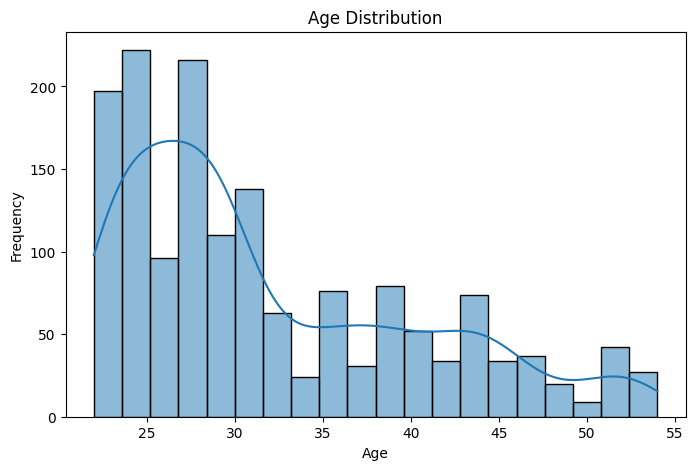

In [ ]:
# Explore the "Age" distribution using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

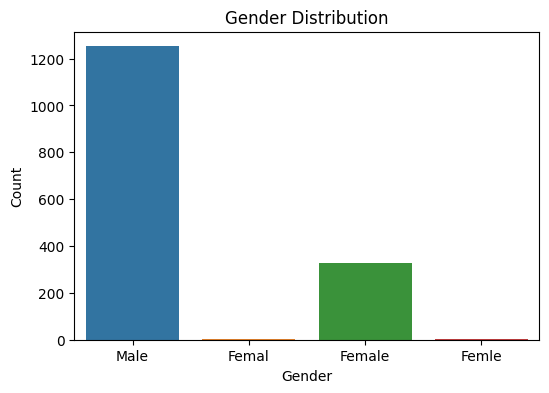

In [ ]:
# Explore the "Gender" distribution using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

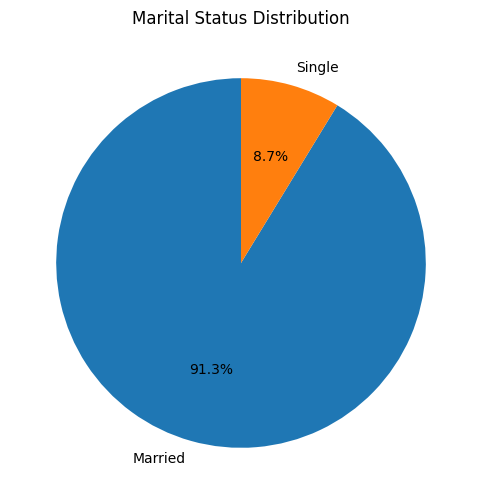

In [ ]:
# Explore the "Marital_status" distribution using a pie chart
marital_status_counts = df["Marital_status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Marital Status Distribution")
plt.show()

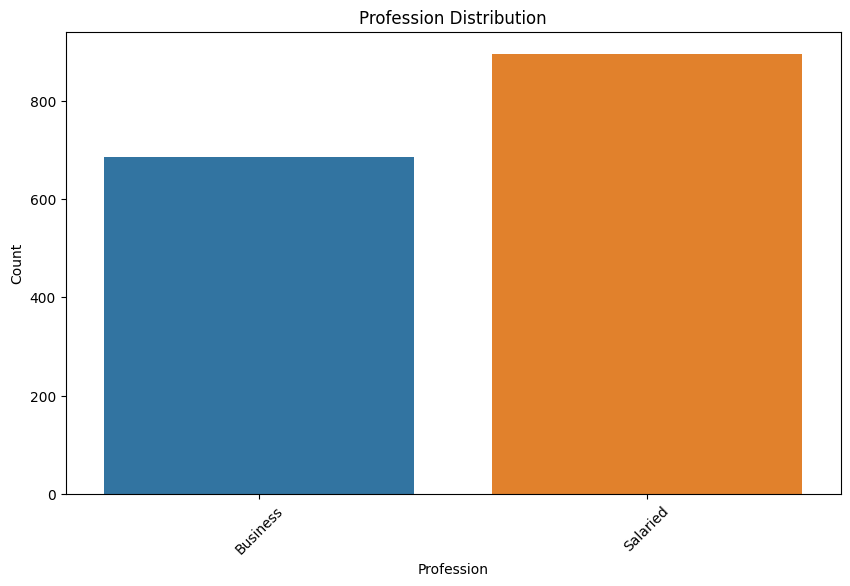

In [ ]:
# Explore the "Profession" distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Profession")
plt.title("Profession Distribution")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

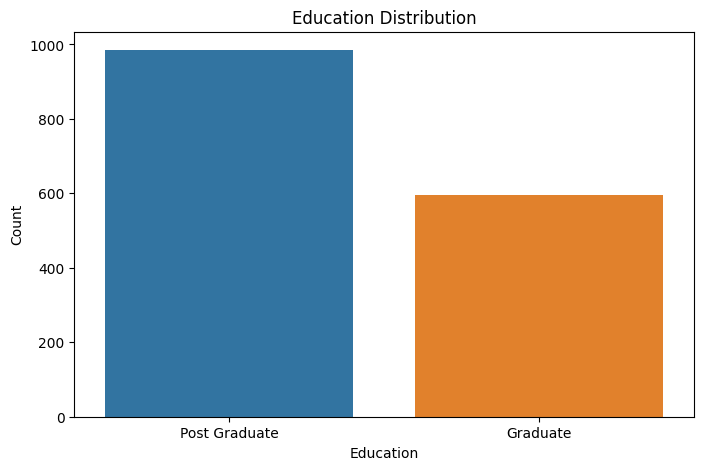

In [ ]:
# Explore the "Education" distribution using a bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Education")
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

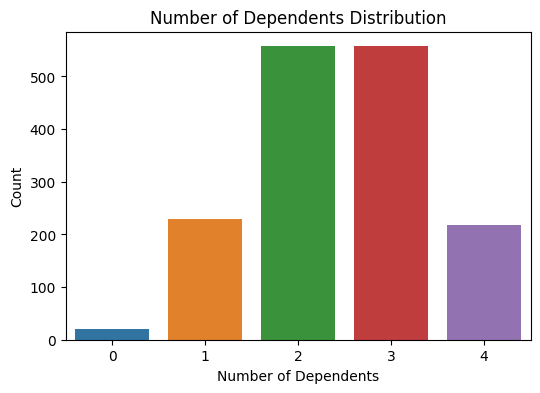

In [ ]:
# Explore the "No_of_Dependents" distribution using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="No_of_Dependents")
plt.title("Number of Dependents Distribution")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.show()

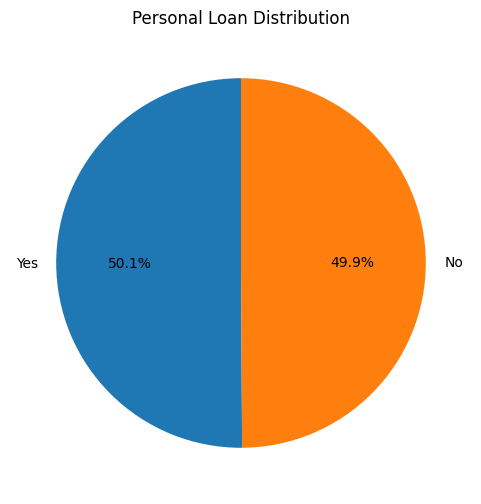

In [ ]:
# Explore the "Personal_loan" distribution using a pie chart
personal_loan_counts = df["Personal_loan"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(personal_loan_counts, labels=personal_loan_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Personal Loan Distribution")
plt.show()

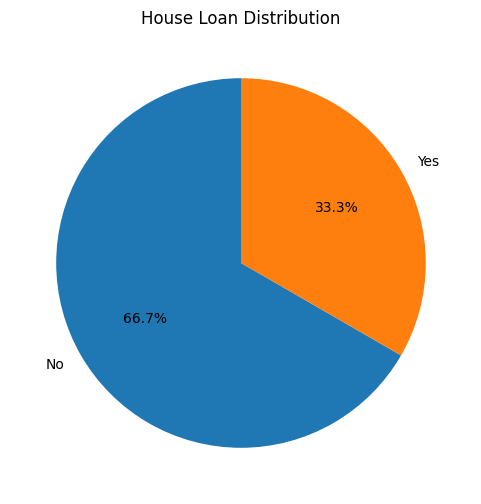

In [ ]:
# Explore the "House_loan" distribution using a pie chart
house_loan_counts = df["House_loan"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(house_loan_counts, labels=house_loan_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("House Loan Distribution")
plt.show()

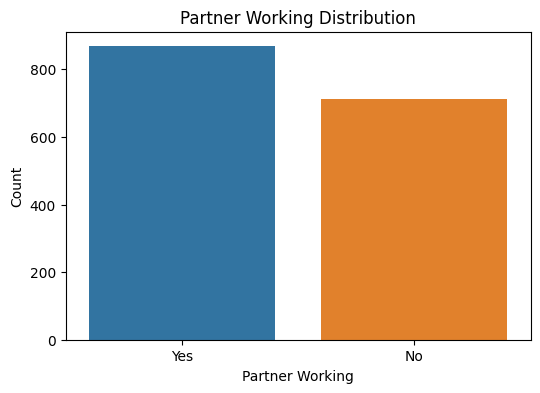

In [ ]:
# Explore the "Partner_working" distribution using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Partner_working")
plt.title("Partner Working Distribution")
plt.xlabel("Partner Working")
plt.ylabel("Count")
plt.show()

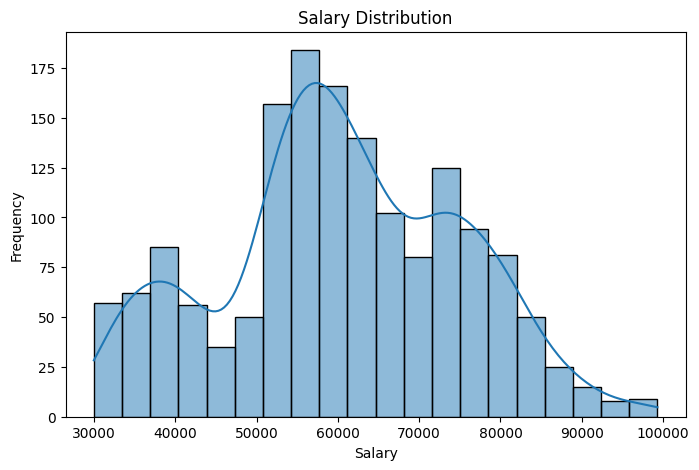

In [ ]:
# Explore the "Salary" distribution using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Salary"], bins=20, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

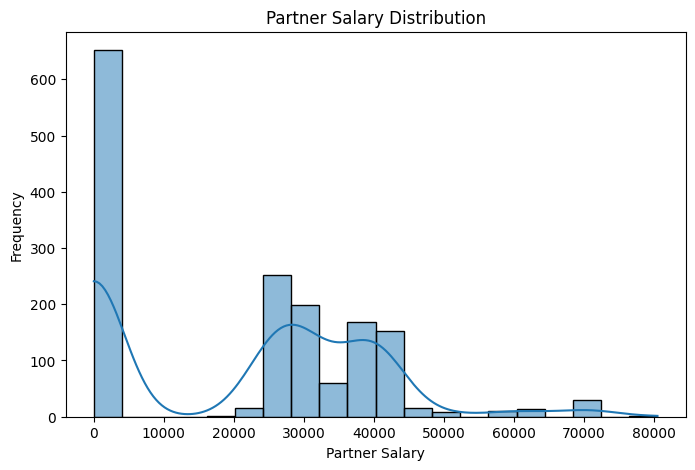

In [ ]:
# Explore the "Partner_salary" distribution using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Partner_salary"], bins=20, kde=True)
plt.title("Partner Salary Distribution")
plt.xlabel("Partner Salary")
plt.ylabel("Frequency")
plt.show()

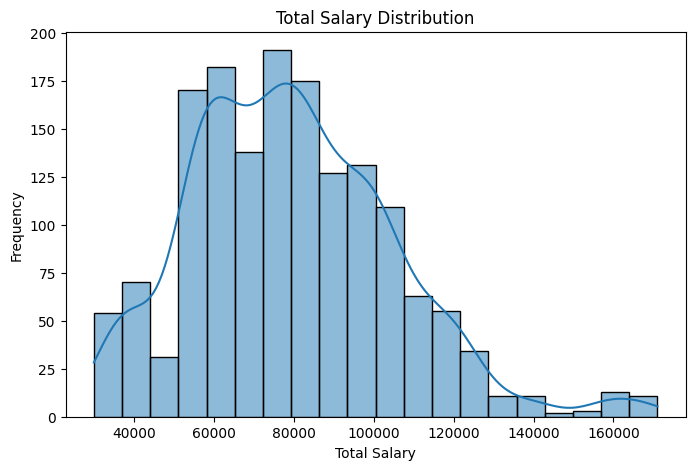

In [ ]:
# Explore the "Total_salary" distribution using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Total_salary"], bins=20, kde=True)
plt.title("Total Salary Distribution")
plt.xlabel("Total Salary")
plt.ylabel("Frequency")
plt.show()


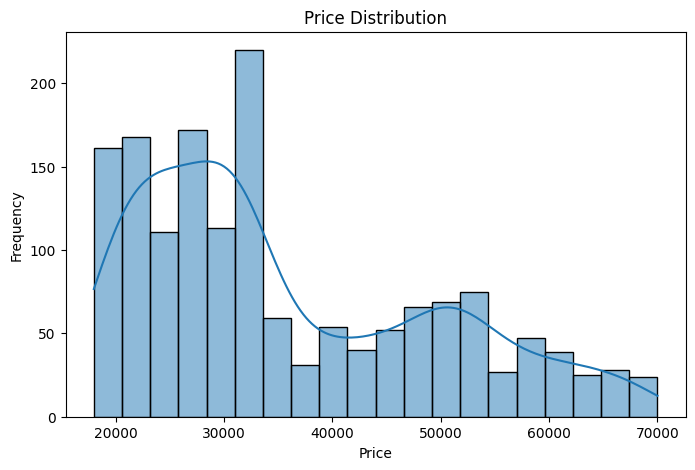

In [ ]:
# Explore the "Price" distribution using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


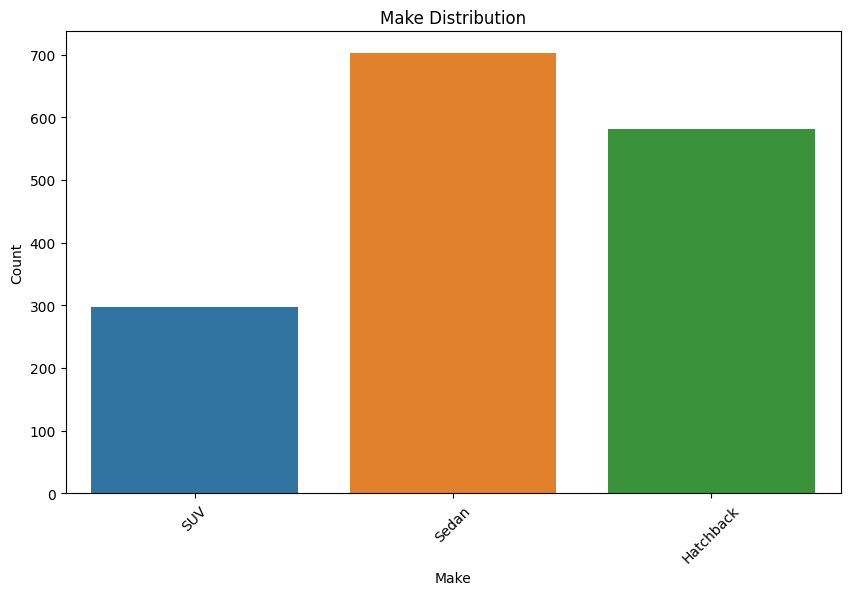

In [ ]:
# Explore the "Make" distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Make")
plt.title("Make Distribution")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.



In [ ]:
# Calculate the correlation matrix among numerical variables
correlation_matrix = df.corr()

<ipython-input-417-0d18d0dfd954>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


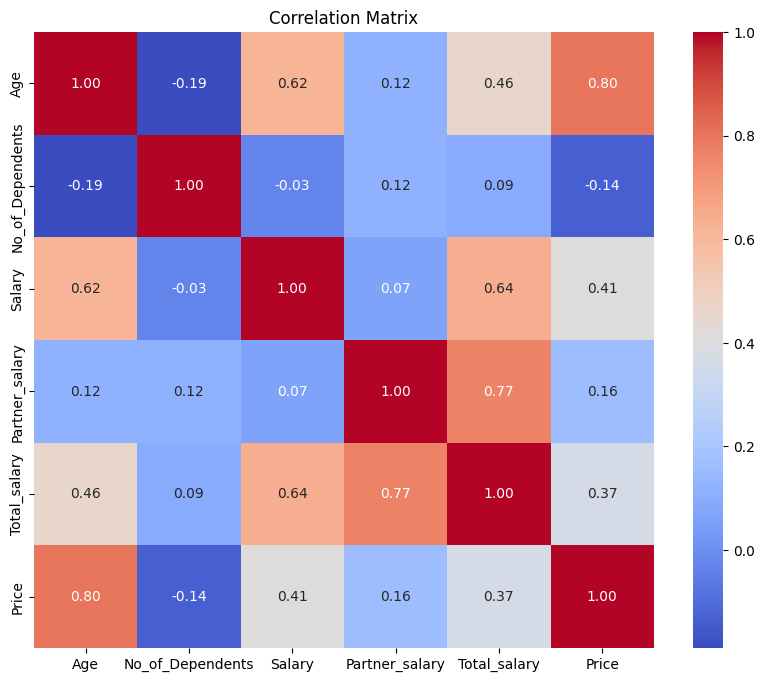

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

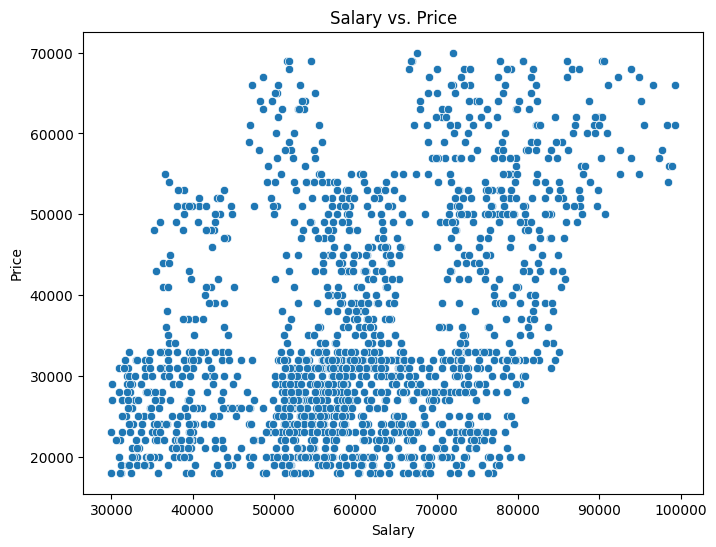

In [ ]:
# Explore the relationship between "Salary" and "Price" using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Salary", y="Price")
plt.title("Salary vs. Price")
plt.xlabel("Salary")
plt.ylabel("Price")
plt.show()

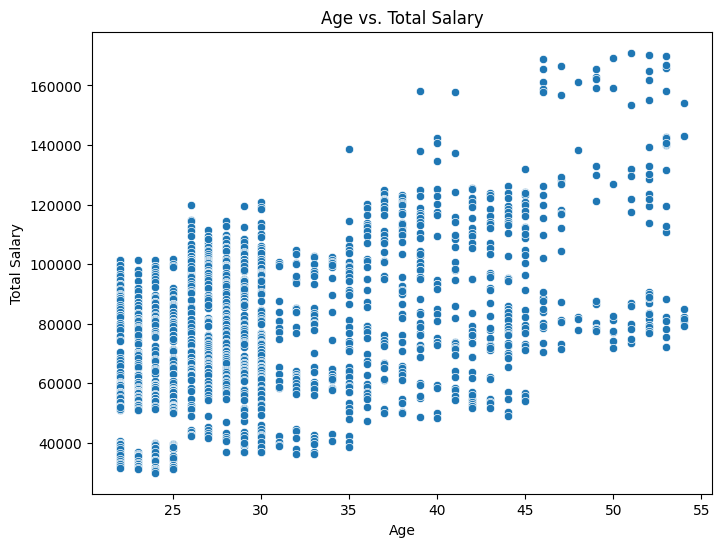

In [ ]:
# Explore the relationship between "Age" and "Total_salary" using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Total_salary")
plt.title("Age vs. Total Salary")
plt.xlabel("Age")
plt.ylabel("Total Salary")
plt.show()

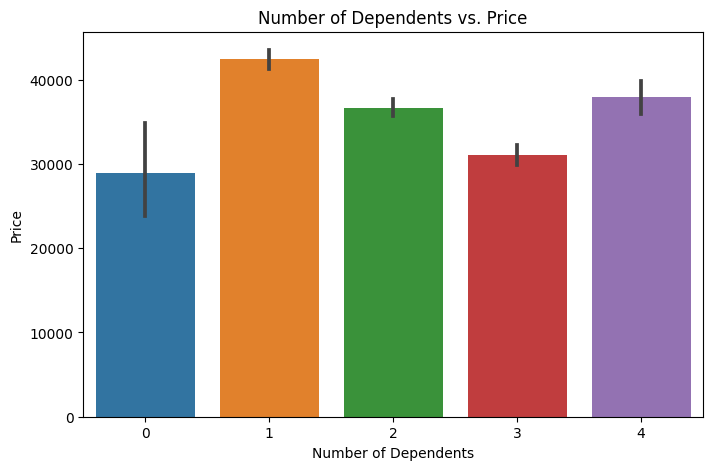

In [ ]:
# Explore the relationship between "No_of_Dependents" and "Price" using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="No_of_Dependents", y="Price")
plt.title("Number of Dependents vs. Price")
plt.xlabel("Number of Dependents")
plt.ylabel("Price")
plt.show()

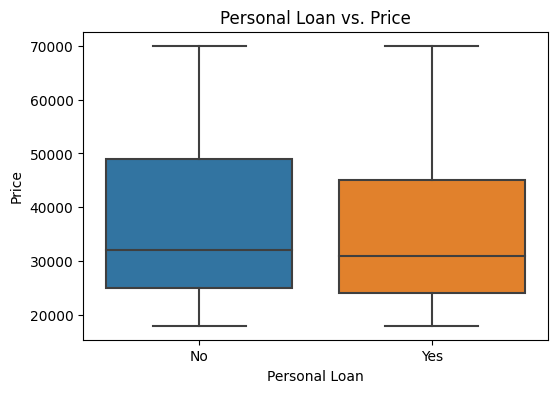

In [ ]:
# Explore the relationship between "Personal_loan" and "Price" using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Personal_loan", y="Price")
plt.title("Personal Loan vs. Price")
plt.xlabel("Personal Loan")
plt.ylabel("Price")
plt.show()

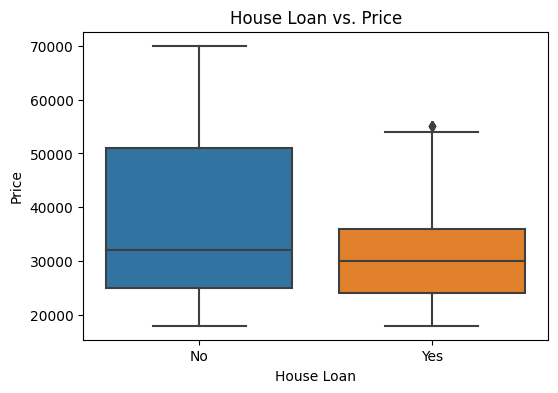

In [ ]:
# Explore the relationship between "House_loan" and "Price" using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="House_loan", y="Price")
plt.title("House Loan vs. Price")
plt.xlabel("House Loan")
plt.ylabel("Price")
plt.show()

Multi-variate Analysis - Scatter Plot (Age, Total_salary, and Price)

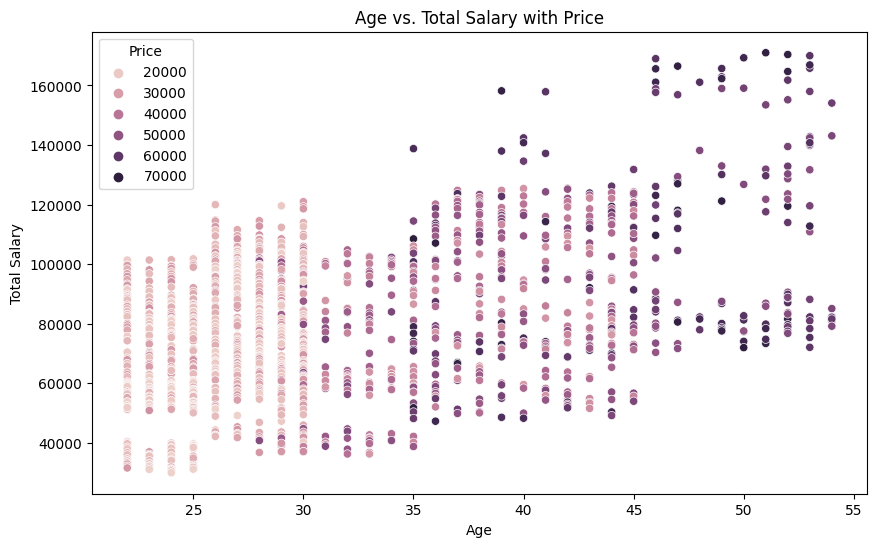

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Total_salary", hue="Price")
plt.title("Age vs. Total Salary with Price")
plt.xlabel("Age")
plt.ylabel("Total Salary")
plt.show()


**Insights:**
The scatter plot shows the relationship between "Age" and "Total_salary" while using "Price" as the hue.
The plot indicates that there is no clear linear relationship between age and total salary for different price categories of cars.
We can observe scattered points across the plot, suggesting that age and total salary may not be the dominant factors influencing car prices. Other variables may play a more significant role.

Multi-variate Analysis - Bar Plot (No_of_Dependents and Count of Car Types)

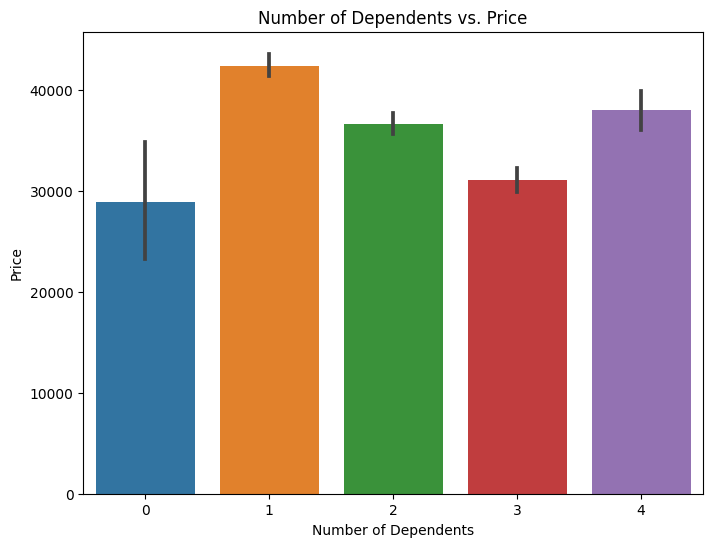

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="No_of_Dependents", y="Price")
plt.title("Number of Dependents vs. Price")
plt.xlabel("Number of Dependents")
plt.ylabel("Price")
plt.show()


**Insights:**

The bar plot shows the average car prices for different numbers of dependents.
Customers with fewer dependents tend to buy cars with higher average prices compared to those with more dependents.
This could indicate that customers with fewer dependents have more disposable income or prefer more expensive cars.

Multi-variate Analysis - Scatter Plot (Salary, Age, and Price)


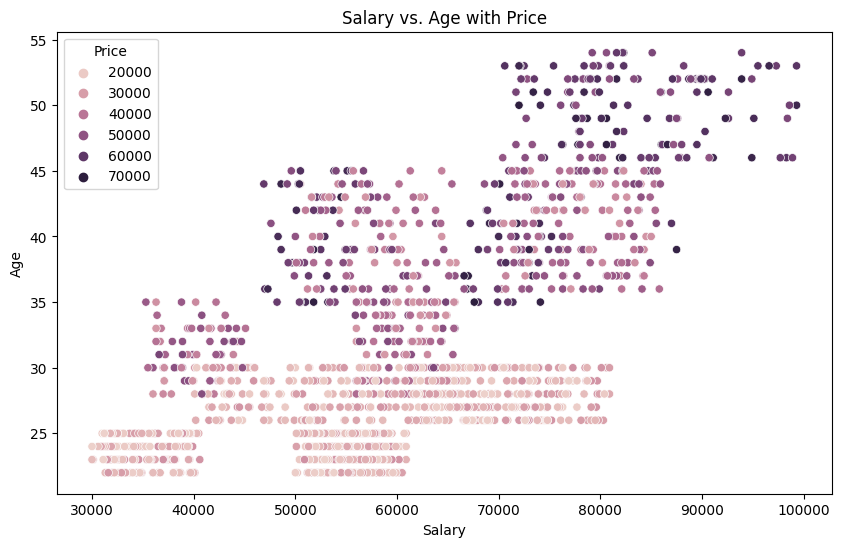

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Salary", y="Age", hue="Price")
plt.title("Salary vs. Age with Price")
plt.xlabel("Salary")
plt.ylabel("Age")
plt.show()


**Insights:**

The scatter plot shows the relationship between "Salary" and "Age" while using "Price" as the hue.
The plot suggests that there is no straightforward relationship between salary and age for different price categories of cars.
We can observe points scattered across the plot, indicating that other factors beyond salary and age might have a more significant impact on car prices.

Multi-variate analysis - Bar Plot (Three categorical variables)

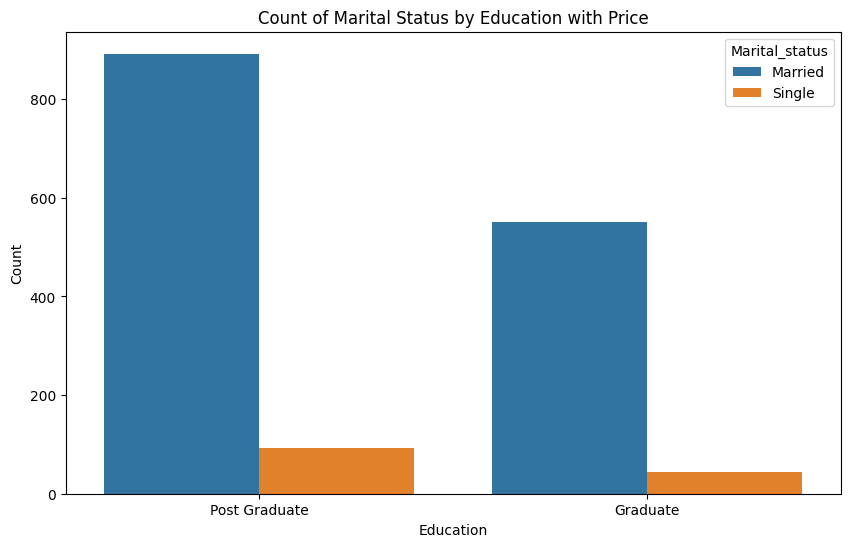

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Education", hue="Marital_status", y="Price", estimator=len)
plt.title("Count of Marital Status by Education with Price")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()


**Insights:**

The bar plot shows the count of marital status for each education level with the "Price" variable as an indicator.
It allows us to observe the distribution of marital status within different education levels and understand if any education level has a higher concentration of married or single customers.

### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

#### E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

Based on the plot, we can see the gender distribution for each car type. If Steve's claim is correct, we should observe a higher number of males for the SUV category compared to females.

Justification:
By examining the plot, we can determine if there is a significant difference in the number of males and females who prefer SUVs. If the number of males preferring SUVs is considerably higher than females, it would support Steve's observation.

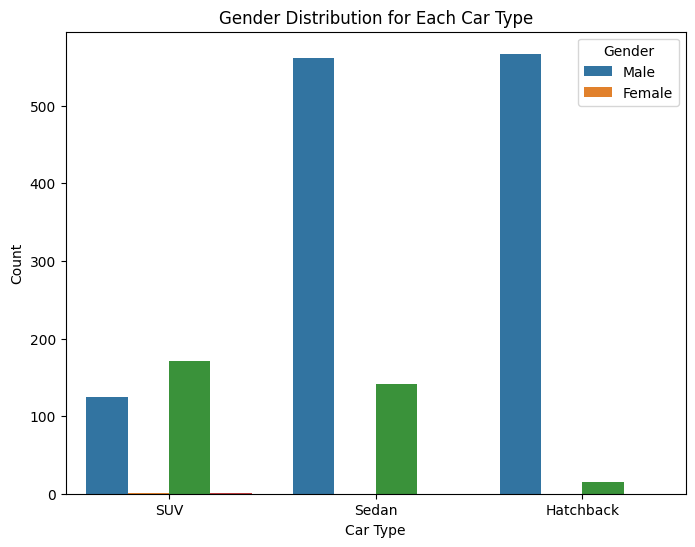

In [ ]:
# Create a bar plot to compare gender distribution for each car type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Make", hue="Gender")
plt.title("Gender Distribution for Each Car Type")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.legend(title="Gender", loc="upper right", labels=["Male", "Female"])
plt.show()

#### E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

By examining this plot, we can see if a salaried person (likely to have a personal loan) prefers Sedans more than other car types.

Justification:
If Ned's claim is true, we should observe a higher proportion of people with personal loans buying Sedans compared to other car types.

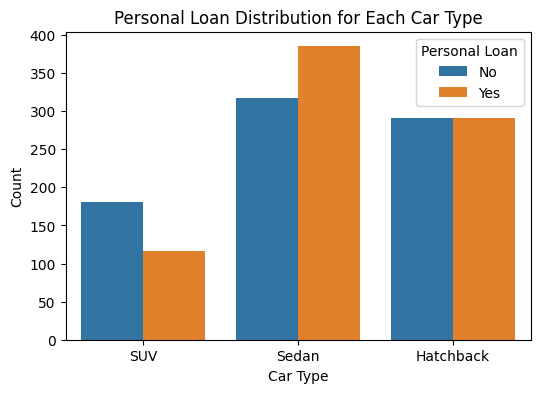

In [ ]:
# Create a bar plot to compare the distribution of "Personal_loan" for each car type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Make", hue="Personal_loan")
plt.title("Personal Loan Distribution for Each Car Type")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.legend(title="Personal Loan", loc="upper right", labels=["No", "Yes"])
plt.show()

#### E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for an SUV sale over a Sedan Sale.

By examining this plot, we can see if salaried males show a higher preference for SUVs compared to Sedans.

Justification:
If Sheldon's claim is true, we should observe a higher number of salaried males choosing SUVs over Sedans compared to other groups (salaried females and non-salaried males and females).

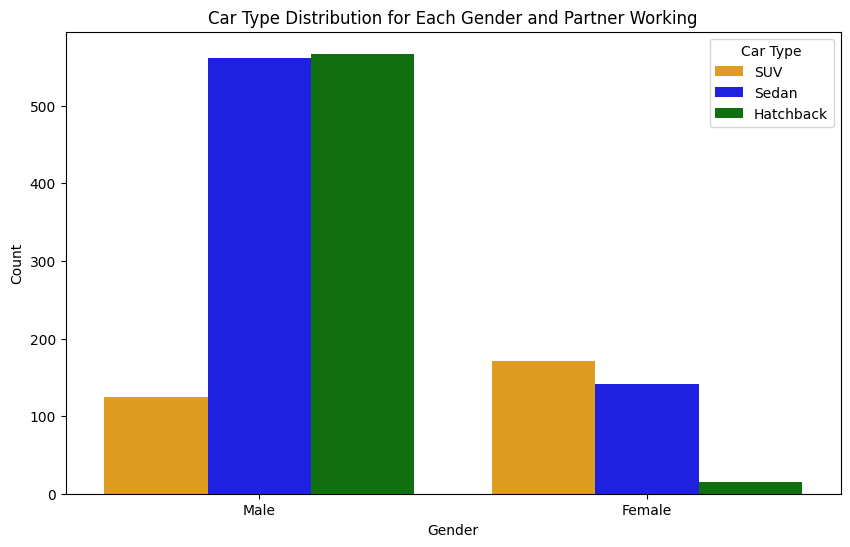

In [ ]:
# Create a bar plot to compare the distribution of "Make" for each combination of Gender and Partner_working
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gender", hue="Make", order=["Male", "Female"], hue_order=["SUV", "Sedan", "Hatchback"], palette=["orange", "blue", "green"])
plt.title("Car Type Distribution for Each Gender and Partner Working")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Car Type", loc="upper right", labels=["SUV", "Sedan", "Hatchback"])
plt.show()

### F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.



#### F1) Gender
Justification:
If we observe a significant difference in the average amount spent on automobiles between males and females, the business can utilize this information to tailor marketing strategies and promotions for each gender. For example, if males tend to spend more, the business can offer premium or high-end car models, while for females, they can focus on providing options that align with their preferences and budget.

<ipython-input-431-3687fa60852e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Gender", y="Price", ci=None)


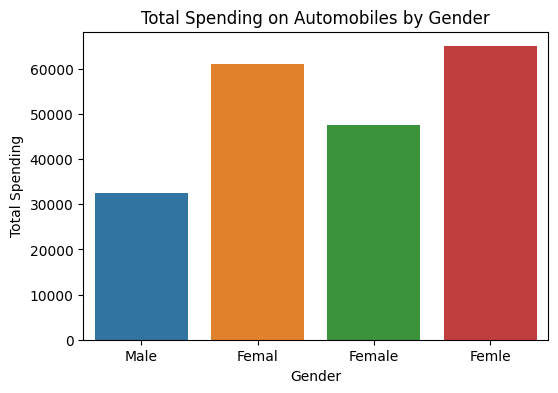

In [ ]:
# Create a bar plot to compare the total spending of males and females
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Gender", y="Price", ci=None)
plt.title("Total Spending on Automobiles by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Spending")
plt.show()

#### F2) Personal_loan:
Justification:
If we observe a difference in the distribution of spending between customers with and without personal loans, the business can utilize this information to create targeted offers. For instance, customers with personal loans may have different financial considerations, so the business can offer financing options or deals that cater to their specific needs. On the other hand, customers without personal loans may prefer one-time payment options or incentives for immediate purchase.

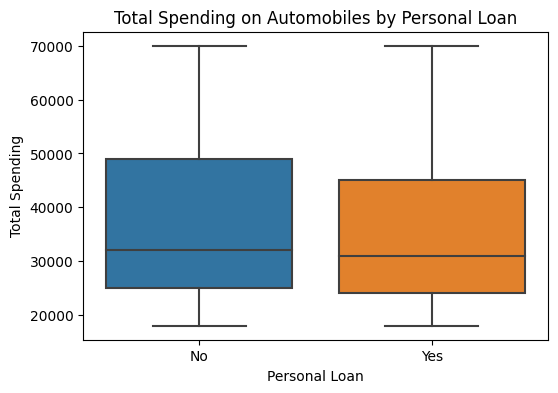

In [ ]:
# Create a box plot to compare the distribution of spending for customers with and without personal loans
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Personal_loan", y="Price")
plt.title("Total Spending on Automobiles by Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("Total Spending")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


### G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.



<ipython-input-433-6490fbf67b9d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Partner_working", y="Price", ci=None)


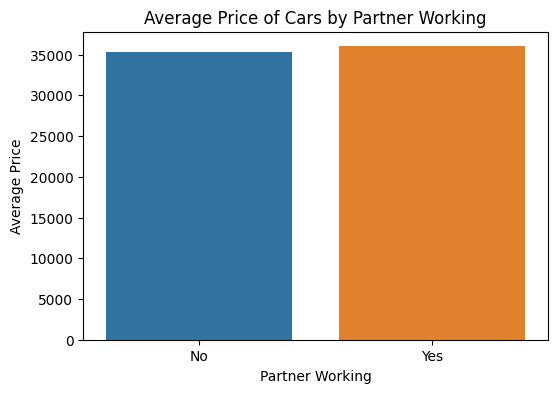

In [ ]:
# Create a bar plot to compare the average price of cars for customers with and without a working partner
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Partner_working", y="Price", ci=None)
plt.title("Average Price of Cars by Partner Working")
plt.xlabel("Partner Working")
plt.ylabel("Average Price")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.



<ipython-input-434-fb9fa30445dd>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x="Gender", y="Price", hue="Marital_status", ci=None)


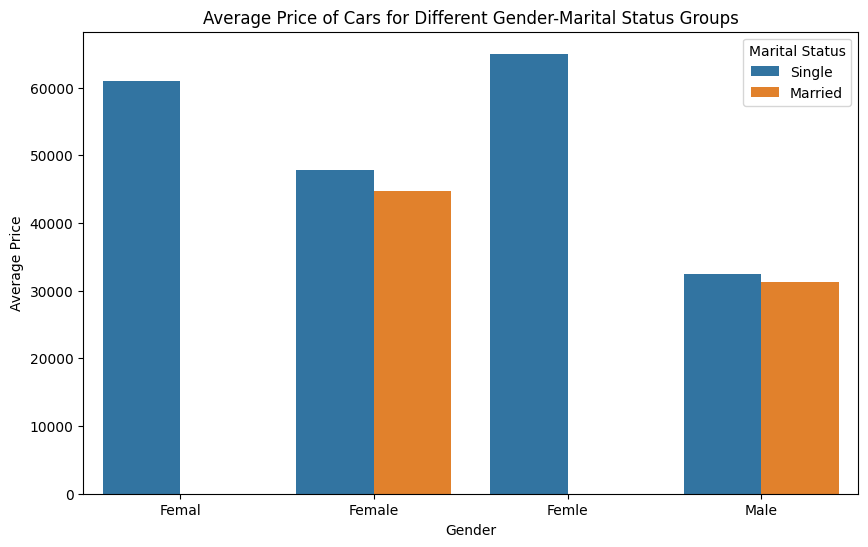

In [ ]:
# Group customers based on Gender and Marital_status and calculate the average price of cars for each group
grouped_data = df.groupby(["Gender", "Marital_status"])["Price"].mean().reset_index()

# Create a bar plot to visualize the average price of cars for each group
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x="Gender", y="Price", hue="Marital_status", ci=None)
plt.title("Average Price of Cars for Different Gender-Marital Status Groups")
plt.xlabel("Gender")
plt.ylabel("Average Price")
plt.legend(title="Marital Status", loc="upper right", labels=["Single", "Married"])
plt.show()

**Insights and Marketing Strategy:**

- Single Males and Females: If the average price of cars is higher for singles, they may prefer premium car models. Target them with campaigns showcasing luxury features.

- Married Males and Females: If the average price of cars is higher for married customers, they may be interested in family-oriented or SUV models. Market spacious and safe vehicles to them.

- Gender-Specific Preferences: Compare average prices between single males and females, as well as married males and females, to identify gender-specific preferences. Tailor marketing to address their unique needs.

# Problem 2

A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

## Problem 2 Question: ( Analyze the dataset and list down the top 5 important variables, along with the business justifications. (10 Points) Data Dictionary - Link )

<ipython-input-435-d862a8b92b7f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Top 5 Important Variables:
- active_30
- active_60
- active_90
- T+6_month_activity
- T+12_month_activity


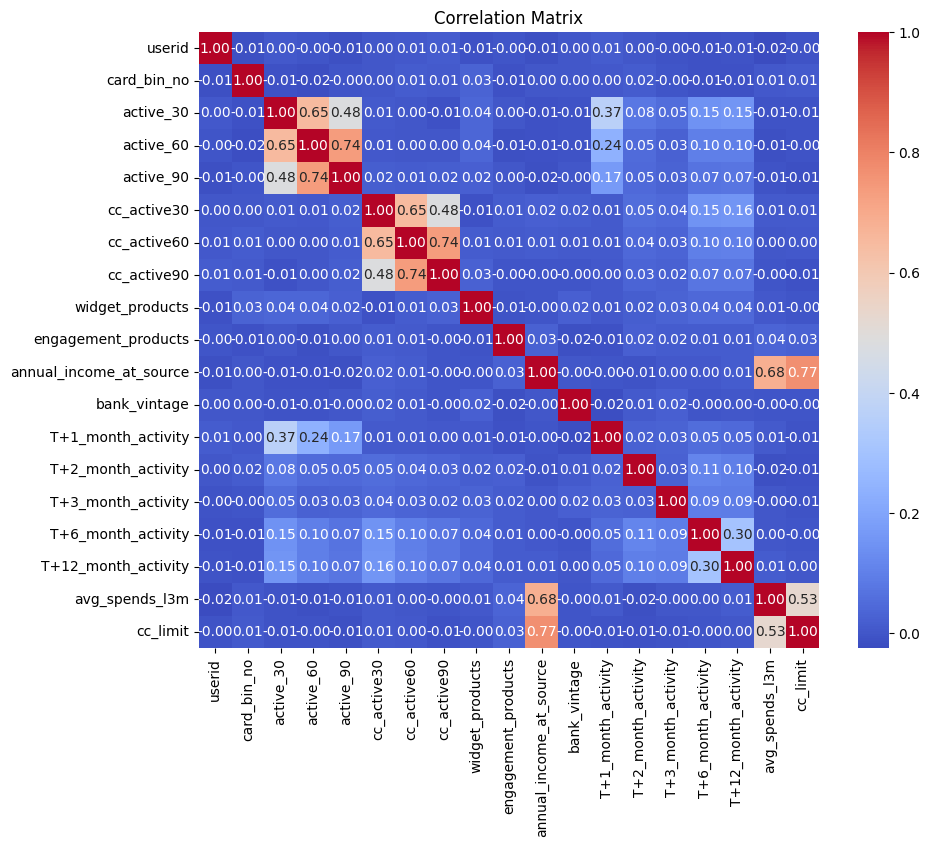

In [ ]:
df = pd.read_excel("/godigt_cc_data .xlsx")

# Calculate the correlation matrix among variables
correlation_matrix = df.corr()

# Identify the top 5 variables with the highest correlation to "T+1_month_activity" (Credit Card Spending Next Month)
top_5_variables = correlation_matrix["T+1_month_activity"].abs().nlargest(6).index.tolist()[1:]

# Print the top 5 important variables
print("Top 5 Important Variables:")
for variable in top_5_variables:
    print("- " + variable)

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**cc_active90 (Credit Card Activity in Last 90 Days):**
Indicates active credit card users likely to retain and spend more.

**annual_income_at_source (Annual Income Recorded in Credit Card Application):**
Determines creditworthiness and spending capacity.

**Transactor_revolver (Credit Card Revolver vs. Transactor):**
Helps tailor credit card offerings for different payment behaviors.

**avg_spends_l3m (Average Credit Card Spends in Last 3 Months):**
Identifies high-spending customers for targeted campaigns.

**cc_limit (Current Credit Card Limit):**
Influences spending capacity and potential revenue generation.